In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# use of keras to train the model
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

In [ ]:
#Load data

df_train = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/MNIST/train.csv")
df_test = pd.read_csv("/content/drive/Othercomputers/Mon ordinateur portable/Data Science/MNIST/test.csv")

In [ ]:
df_train.info()
# 42k rows
# 784 pixel columns +1 for labels

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Extraire un exemple
first_img = df_train.iloc[0, 1:785]
first_img
first_label = df_train.iloc[0,0]
first_label

1

In [ ]:
# Now reshpe the img in a 28x28 pixels

first_img = first_img.values.reshape(28, 28) # we go from a vector 1*784 to a 2D matrix 28*28 = 784, so it can be plot as an img.
first_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

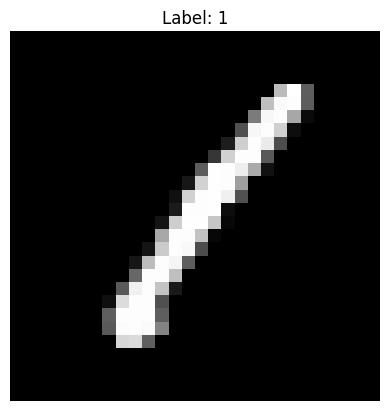

In [ ]:
plt.imshow(first_img, cmap="gray")
plt.title(f"Label: {df_train.iloc[0, 0]}")  # Afficher le label
plt.axis("off")
plt.show()

In [ ]:
images = [df_train.iloc[i,1:785].values for i in range(20)]
images

labels = [df_train.iloc[i,0] for i in range(20)]

images_reshp = [img.reshape(28,28) for img in images]
images_reshp

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
           0

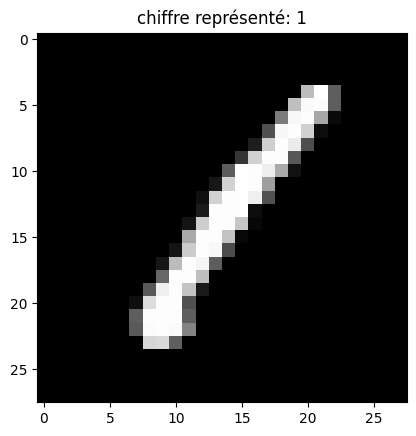

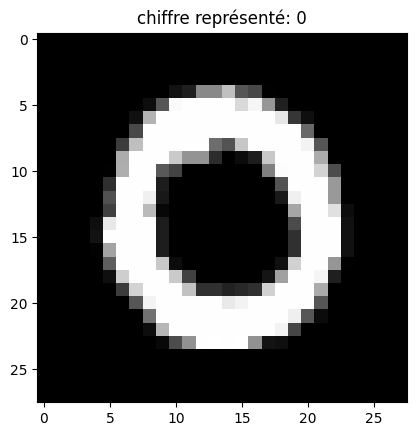

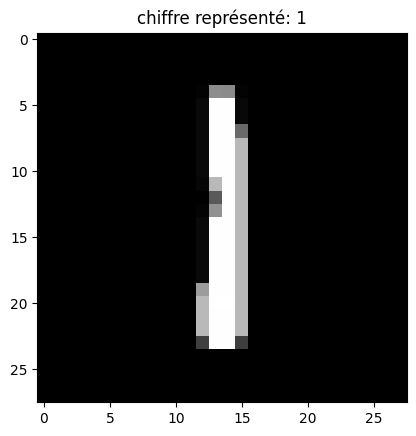

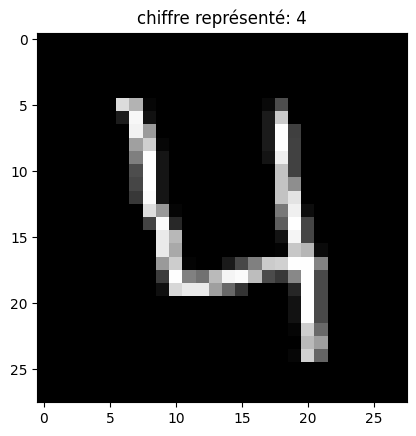

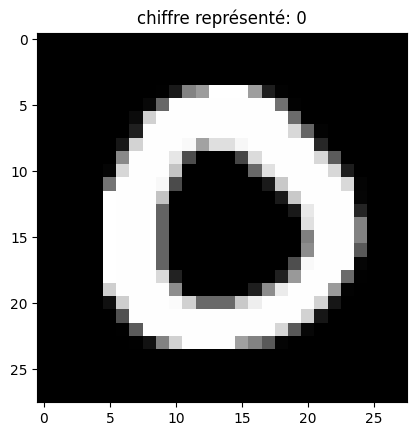

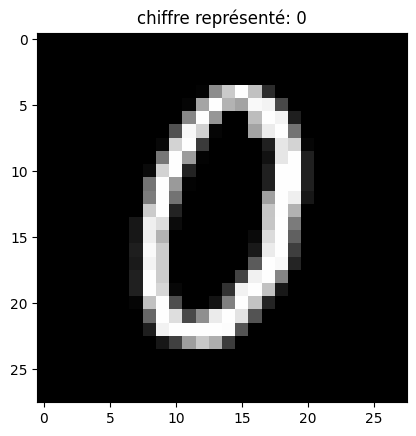

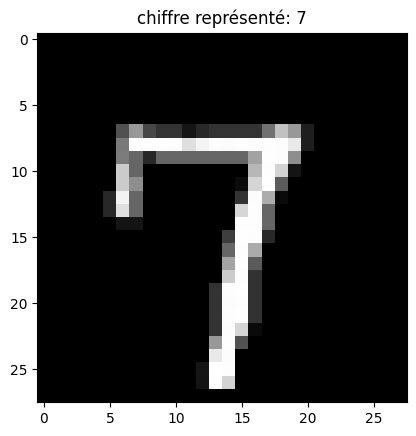

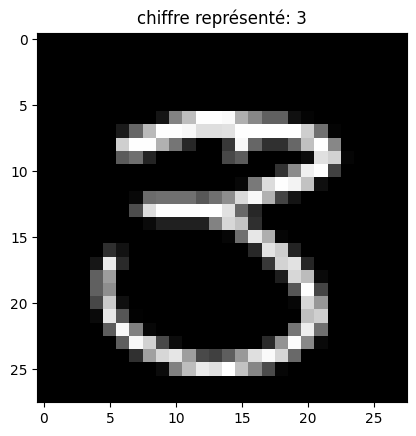

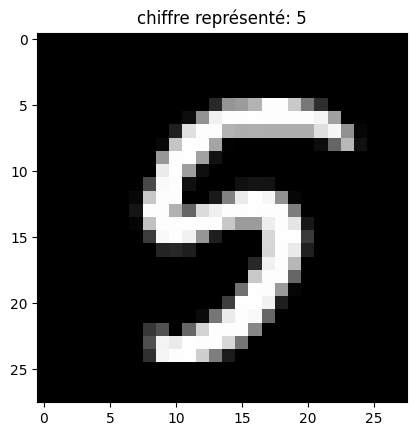

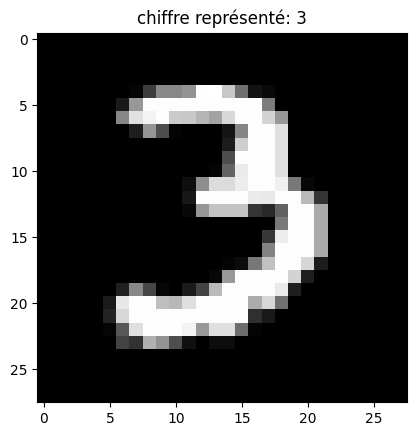

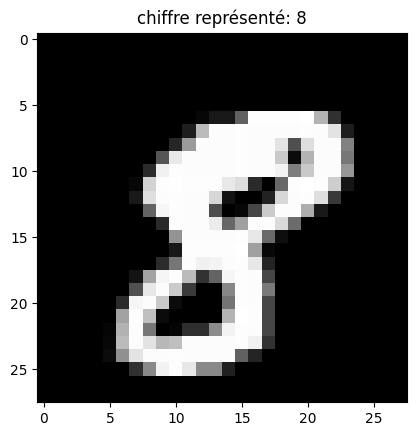

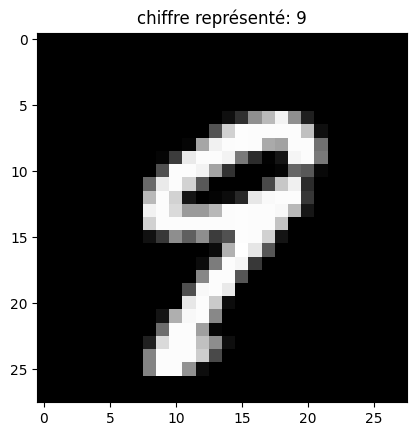

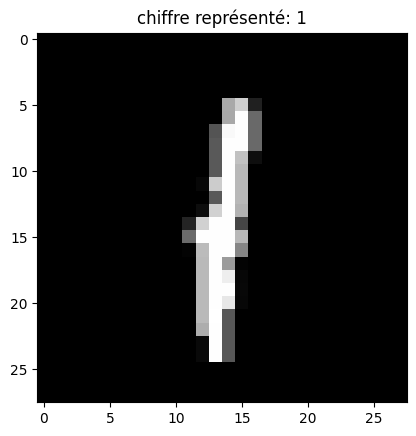

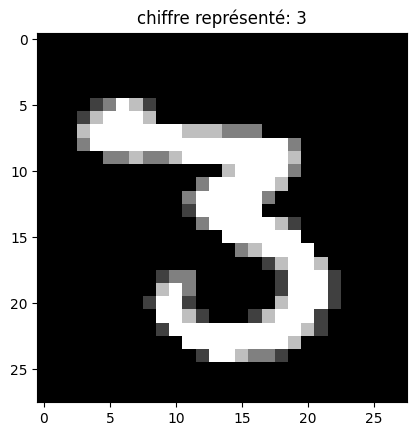

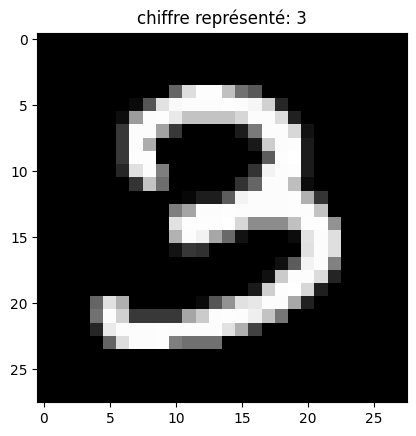

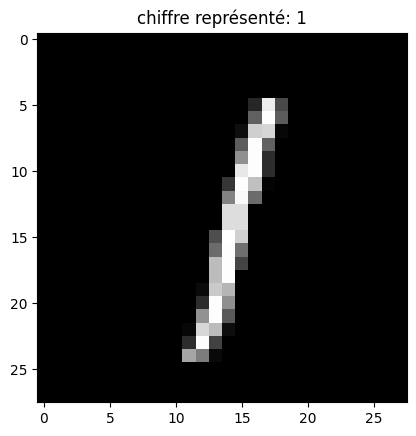

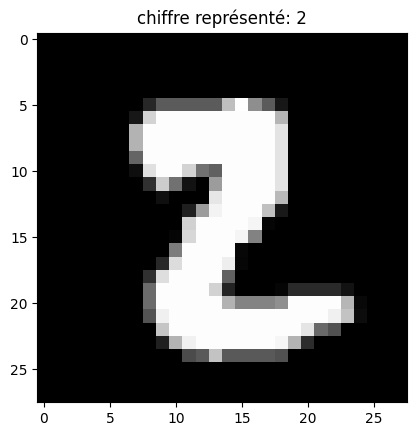

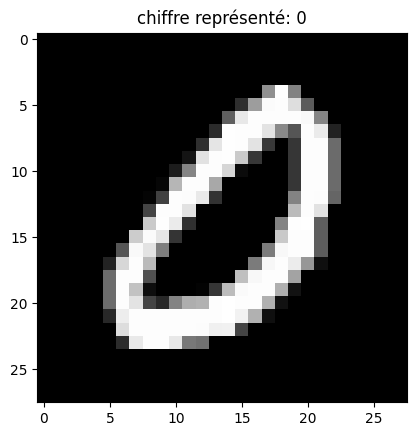

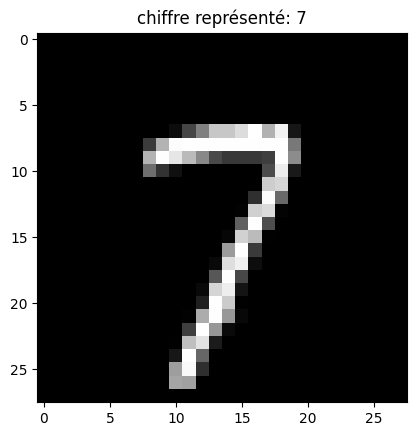

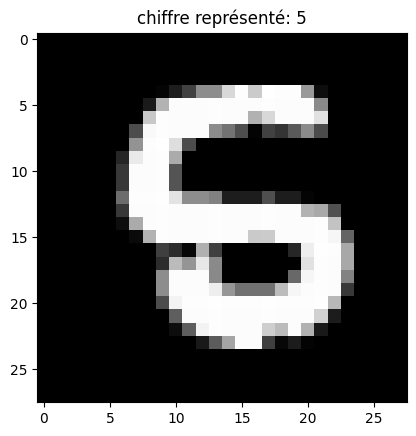

In [ ]:
for idx,img in enumerate(images_reshp):
  plt.imshow(img, cmap="gray")
  plt.title(f"chiffre représenté: {labels[idx]}")
  plt.show()

In [ ]:
# Divide into features and target

df_features = df_train.iloc[:,1:785]
df_target = df_train.iloc[:, 0]

df_test = df_test.iloc[:,0:785] # test dtaset

In [ ]:
df_test #Looks ok

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(df_features, df_target, test_size=0.25)
X_valid



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape#31500 rows(imgs),784 cols(pixels)

(31500, 784)

In [ ]:
#

#Si on entraîne un modèle de machine learning (ex: régression logistique, SVM),

#On a besoin d’une matrice 2D de type (nombre d’images, 784).
#Exemple : X_train.shape == (33600, 784) (33 600 images de 784 pixels).
#On utilise reshape(-1, 784) pour s’assurer que les données sont bien organisées.

# Comme on v utiliserun réseau de neurones dense (MLP - Multi-Layer Perceptron),
#qui prend une entrée en 1D (flat vector), il faut etre certain de bien avoir le format (entries, 784) !!!

# Et la foction reshape mange du numpy mais ps du pd.df, donc il faut adapter:

type(X_train)# pd.dataframe




#arr = np.arange(12)  # Un tableau de 12 éléments : [0, 1, 2, ..., 11]
#arr.reshape(3, -1)   # -1 ajuste la deuxième dimension
#NumPy comprend qu'il doit organiser les 12 éléments en 3 lignes.
#Il calcule automatiquement le nombre de colonnes (4 dans ce cas).

X_train = X_train.to_numpy().reshape(X_train.shape[0], 784)
# ou encore mieux on change le 784 en -1 pour laisser numpy reshape automatiquement

X_valid = X_valid.to_numpy().reshape(X_valid.shape[0], 784)


In [ ]:
print((min(X_train[1]), max(X_train[1]))) # our data is indeed shades of gray, between 0 nd 255
# We would like more to have values between 0 and 1, "normalised" before feeding the model with it

(0, 255)


In [ ]:
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_valid /= 255
X_train[1]#check one example => ok

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14117648, 0.6431373 , 0.47058824, 0.        , 0.     

In [ ]:
# We managed the features (X_train and X_valid)
# We now need to manage the target (labels from 0 to 9)

# But how do we encode?


#Méthode                       	Fonctionne ?	                Problème

#LabelEncoder()	                    ❌	                Transforme en entiers, pas en one-hot. Donc induit un ordinalité qui n'a pas lieu d'eter

#pd.get_dummies()                  	✅	                Fonctionne, mais moins optimisé mais dépend de pandas donc coute plus cher en ressources

#to_categorical()	                ✅✅✅	             Meilleure option : rapide, optimisé pour Keras.


In [ ]:
# Let's then use to_categorical

from tensorflow.keras.utils import to_categorical

# Conversion des labels en one-hot encoding
label_num = 10
Y_train = to_categorical(Y_train, num_classes=label_num) # Numpy table
Y_valid = to_categorical(Y_valid, num_classes=label_num)


print(Y_train.shape)  # (nombre_d_échantillons, 10)


(31500, 10)


In [ ]:
Y_train # Chaque digit est encodé de la maniere suivante

#ex:
# supposons y_train = [0, 3, 5, 7]
#alors l'encodage one_hot via to_categorical donnera:
#0  →  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#3  →  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#5  →  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
#7  →  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# We now have our data ready to be used in the model
# We'll use  a simple NNET with Keras (TensorFlow bckend), and our metric will be the accuracy (to perform on the validation data)

#Model 1: Simple Neural Network with 4 layers (300, 100, 100, 200)

# We will use the activation function set as ReLu (ReLu(x)=max(0,x)). To determine which class to output, we will rely on the SoftMax function

#Pourquoi ReLU ?
#Elle est rapide à calculer, ce qui accélère l'entraînement.
#Elle permet de mieux gérer le problème de vanishing gradient (lorsque les gradients deviennent très petits et empêchent l'apprentissage), contrairement à des fonctions comme Sigmoid.
#Elle introduit une non-linéarité importante dans le modèle, ce qui lui permet d'apprendre des relations complexes.

#Pourquoi Softmax ? Softmax(x_i) = exp(x_i) / sum(exp(x_j) for all j)
#Elle garantit que la somme des probabilités pour toutes les classes sera égale à 1, ce qui est parfait pour une classification multiclasses.
#La classe avec la probabilité la plus élevée sera choisie comme classe prédite.


# Reminder:
# Les fonctions d'activation dans les couches cachées permettent au réseau d'apprendre des représentations non linéaires et complexes des données d'entrée.
# Les prédictions finales sont effectuées dans la couche de sortie avec des fonctions d'activation spécifiques comme Softmax ou Sigmoid, selon la tâche.


In [ ]:
# Hidden layers and numbers of neurons:

#Trop de couches / trop de neurones : Cela peut entraîner un surapprentissage (overfitting),
#où le modèle devient trop spécifique aux données d’entraînement et ne généralise pas bien aux nouvelles données.
#Il peut aussi devenir plus lent à entraîner.
#Trop peu de couches / trop peu de neurones : Le modèle peut manquer de la capacité nécessaire pour apprendre
# des représentations complexes et donner de mauvaises performances.

In [ ]:
# Nous utiliserons d'abord 3 couches cachées avec entre 100 et 500 neurones par couche. (conseillé par Chat GPT)
# Il serait également possible de grid/random search ces hyparametres architecturaux

# Input Parameters
num_input  = 784 # number of features
num_labels = 10  # number of labels
n_hidden_1 = 400
n_hidden_2 = 200
n_hidden_3 = 200
n_hidden_4 = 200


In [ ]:
# Construction du NNET
Inp = Input(shape=(784,)) #(784,) = Un vecteur plat (1D) → Ex : image aplatie, feature vector. (784, x) = Une matrice (2D) → Ex : séries temporelles, features supplémentaires.
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp) # first layer that eats Inputs nd connects to second layer
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x) # 2nd that eats first lyers and connects to 3rd
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x) # ...
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x) #....
output = Dense(num_labels, activation='softmax', name = "Output_Layer")(x) # Output layer that eats 4th layer and shits the result


In [ ]:
# Our model would have '6' layers - input layer, 4 hidden layer and 1 output layer
model = Model(Inp, output)
model.summary() # We have 476,610 parameters to estimate

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_1 (Dense)               │ (None, 400)                 │         314,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_2 (Dense)               │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_3 (Dense)               │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_Layer_4 (Dense)               │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 10)                  │           2,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 476,610 (1.82 MB)

 Trainable params: 476,610 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Hyperparameters (we saw that numbers of layers and neurons can also be optimized)
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(learning_rate=learning_rate) # stochastic gradient descent

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model_1 = model.fit(X_train, Y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_valid, Y_valid))

Epoch 1/20
315/315 - 6s - 18ms/step - accuracy: 0.5465 - loss: 1.7452 - val_accuracy: 0.7859 - val_loss: 0.8718
Epoch 2/20
315/315 - 3s - 11ms/step - accuracy: 0.8313 - loss: 0.6048 - val_accuracy: 0.8773 - val_loss: 0.4477
Epoch 3/20
315/315 - 3s - 10ms/step - accuracy: 0.8825 - loss: 0.4083 - val_accuracy: 0.8961 - val_loss: 0.3569
Epoch 4/20
315/315 - 7s - 22ms/step - accuracy: 0.9023 - loss: 0.3387 - val_accuracy: 0.9110 - val_loss: 0.3096
Epoch 5/20
315/315 - 3s - 10ms/step - accuracy: 0.9130 - loss: 0.2990 - val_accuracy: 0.9181 - val_loss: 0.2844
Epoch 6/20
315/315 - 5s - 15ms/step - accuracy: 0.9218 - loss: 0.2698 - val_accuracy: 0.9274 - val_loss: 0.2582
Epoch 7/20
315/315 - 7s - 23ms/step - accuracy: 0.9283 - loss: 0.2478 - val_accuracy: 0.9317 - val_loss: 0.2413
Epoch 8/20
315/315 - 8s - 26ms/step - accuracy: 0.9340 - loss: 0.2271 - val_accuracy: 0.9306 - val_loss: 0.2320
Epoch 9/20
315/315 - 5s - 15ms/step - accuracy: 0.9383 - loss: 0.2111 - val_accuracy: 0.9412 - val_loss:

In [ ]:
# Extraire l'accuracy d'entraînement et de validation depuis l'historique
train_accuracy = model_1.history['accuracy']
val_accuracy = model_1.history['val_accuracy']
val_accuracy

[0.7859047651290894,
 0.8773333430290222,
 0.8960952162742615,
 0.9109523892402649,
 0.9180952310562134,
 0.9274285435676575,
 0.9317142963409424,
 0.930571436882019,
 0.9412381052970886,
 0.9443809390068054,
 0.9454285502433777,
 0.9461904764175415,
 0.9511428475379944,
 0.94990473985672,
 0.9538094997406006,
 0.9523809552192688,
 0.9566666483879089,
 0.9563809633255005,
 0.9564762115478516,
 0.9591428637504578]

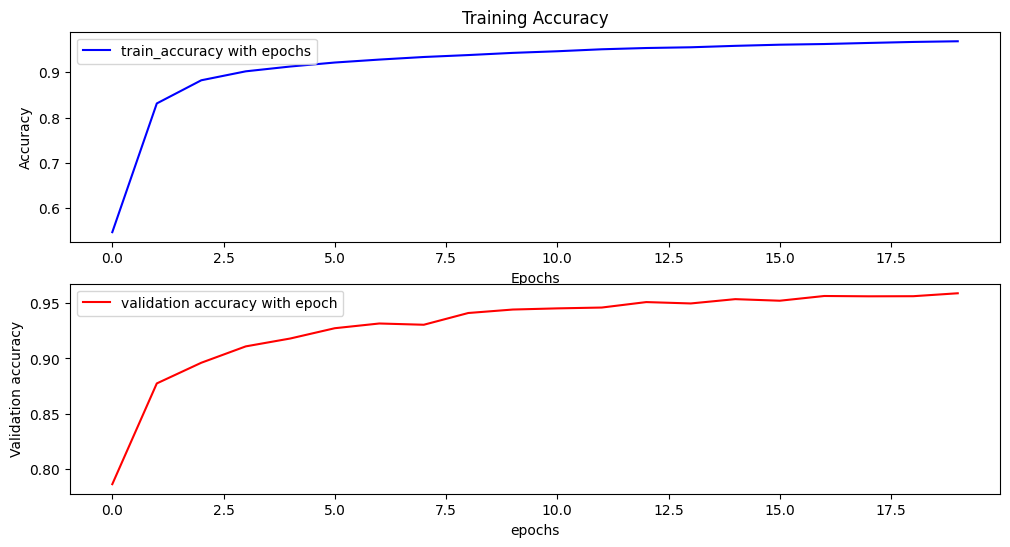

In [ ]:
# Plot
fig, ax = plt.subplots(nrows = 2, figsize = (12,6))
ax[0].plot(range(len(train_accuracy)), train_accuracy, color = 'blue', label ='train_accuracy with epochs')
ax[0].set_title('Training Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[1].plot(range(len(val_accuracy)), val_accuracy, color ='red', label = "validation accuracy with epoch")
ax[1].legend()
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("Validation accuracy")
plt.show()




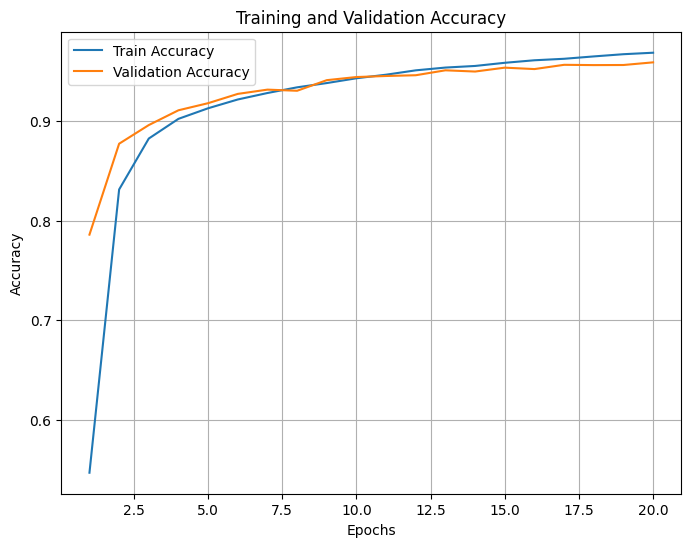

In [ ]:
#Both on 1 plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, training_epochs + 1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, training_epochs + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
"""
def create_neural_net(optimizer='adam', learning_rate=0.01,n_hidden_1=128, n_hidden_2=64, n_hidden_3=32, n_hidden_4=16, num_labels=10): # default values
  Inp = Input(shape=(784,)) #(784,) = Un vecteur plat (1D) → Ex : image aplatie, feature vector. (784, x) = Une matrice (2D) → Ex : séries temporelles, features supplémentaires.
  x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp) # first layer that eats Inputs nd connects to second layer
  x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x) # 2nd that eats first lyers and connects to 3rd
  x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x) # ...
  x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x) #....
  output = Dense(num_labels, activation='softmax', name = "Output_Layer")(x) # Output layer that eats 4th layer and shits the result
  model = Model(Inp, output)
    # Choisir l'optimizer et le learning rate
  if optimizer == 'adam':
      opt = optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
      opt = optimizers.SGD(learning_rate=learning_rate)
  else:
      raise ValueError("L'optimiseur spécifié n'est pas valide. Utilisez 'adam' ou 'sgd'.")

  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  return model

"""

'\ndef create_neural_net(optimizer=\'adam\', learning_rate=0.01,n_hidden_1=128, n_hidden_2=64, n_hidden_3=32, n_hidden_4=16, num_labels=10): # default values\n  Inp = Input(shape=(784,)) #(784,) = Un vecteur plat (1D) → Ex : image aplatie, feature vector. (784, x) = Une matrice (2D) → Ex : séries temporelles, features supplémentaires.\n  x = Dense(n_hidden_1, activation=\'relu\', name = "Hidden_Layer_1")(Inp) # first layer that eats Inputs nd connects to second layer\n  x = Dense(n_hidden_2, activation=\'relu\', name = "Hidden_Layer_2")(x) # 2nd that eats first lyers and connects to 3rd\n  x = Dense(n_hidden_3, activation=\'relu\', name = "Hidden_Layer_3")(x) # ...\n  x = Dense(n_hidden_4, activation=\'relu\', name = "Hidden_Layer_4")(x) #....\n  output = Dense(num_labels, activation=\'softmax\', name = "Output_Layer")(x) # Output layer that eats 4th layer and shits the result\n  model = Model(Inp, output)\n    # Choisir l\'optimizer et le learning rate\n  if optimizer == \'adam\':\n  

In [ ]:
!pip install tensorflow>=2.6.0
!pip install scikit-learn


In [ ]:
"""from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# Créer un modèle KerasClassifier
model = KerasClassifier(build_fn=create_neural_net, verbose=0)
#Ce wrapper permet de transformer la fonction create_neural_net en
#un modèle compatible avec scikit-learn, ce qui permet de l'utiliser avec GridSearchCV.

# Définir la grille d'hyperparamètres
param_grid = {
    'optimizer': ['adam', 'sgd'],  # Teste Adam et SGD
    'learning_rate': [0.05, 0.1, 0.2, 0.5],  # Teste différentes valeurs pour le learning rate
    'batch_size': [50, 100, 200],  # Teste différentes tailles de batch
    'epochs': [10, 20, 50],  # Teste différentes valeurs pour les époques
    'n_hidden_1': [128, 256],
    'n_hidden_2': [64, 128],
    'n_hidden_3': [32, 64],
    'n_hidden_4': [16, 32],
}

# Initialiser GridSearchCV avec 5-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)

# fit
grid_result = grid.fit(X_train, Y_train)
# Affiche
print(f"Meilleur score : {grid_result.best_score_}")
print(f"Meilleure configuration d'hyperparamètres : {grid_result.best_params_}")
"""

'from tensorflow.keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom tensorflow.keras import optimizers\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.layers import Input, Dense\n\n\n# Créer un modèle KerasClassifier\nmodel = KerasClassifier(build_fn=create_neural_net, verbose=0)\n#Ce wrapper permet de transformer la fonction create_neural_net en\n#un modèle compatible avec scikit-learn, ce qui permet de l\'utiliser avec GridSearchCV.\n\n# Définir la grille d\'hyperparamètres\nparam_grid = {\n    \'optimizer\': [\'adam\', \'sgd\'],  # Teste Adam et SGD\n    \'learning_rate\': [0.05, 0.1, 0.2, 0.5],  # Teste différentes valeurs pour le learning rate\n    \'batch_size\': [50, 100, 200],  # Teste différentes tailles de batch\n    \'epochs\': [10, 20, 50],  # Teste différentes valeurs pour les époques\n    \'n_hidden_1\': [128, 256],\n    \'n_hidden_2\': [64, 128],\n    \'n_hidden_3\': [32, 64],\n    \'n_hidden_4\': 

In [ ]:
# MLPClassifier()

"""Le MLPClassifier est un classifieur d'un réseau de neurones multi-couches (Multilayer Perceptron)
implémenté dans la bibliothèque scikit-learn. Il est souvent utilisé pour des tâches de classification
 et constitue une version plus simple de la mise en œuvre de réseaux de neurones dans scikit-learn comparé
  à une approche purement basée sur Keras ou TensorFlow.

Si tu veux utiliser MLPClassifier dans ton code pour entraîner un modèle avec un réseau de
neurones et une recherche d'hyperparamètres, voici un exemple basique. Cependant,
 note que ce modèle ne permet pas une personnalisation aussi fine que celle de Keras,
 comme la gestion des optimisateurs ou des types de couches différentes, mais il peut
 suffire pour de nombreuses tâches simples."""

"Le MLPClassifier est un classifieur d'un réseau de neurones multi-couches (Multilayer Perceptron)\nimplémenté dans la bibliothèque scikit-learn. Il est souvent utilisé pour des tâches de classification\n et constitue une version plus simple de la mise en œuvre de réseaux de neurones dans scikit-learn comparé\n  à une approche purement basée sur Keras ou TensorFlow.\n\nSi tu veux utiliser MLPClassifier dans ton code pour entraîner un modèle avec un réseau de\nneurones et une recherche d'hyperparamètres, voici un exemple basique. Cependant,\n note que ce modèle ne permet pas une personnalisation aussi fine que celle de Keras,\n comme la gestion des optimisateurs ou des types de couches différentes, mais il peut\n suffire pour de nombreuses tâches simples."

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD

#On peut directement utiliser sklearn.neurl_network au lieu de  KerasClassifier de tensorflow
# On définit les neurons et les couches
model = MLPClassifier(hidden_layer_sizes=(128, 64, 32, 16), max_iter=1000, activation='relu', solver='adam', alpha=0.0001, random_state=42)

# On rappe"lle que dans le mdoele précédent on avait définit epoch = 20 avec Keras
# Scikit-Learn fonctionne un peu différemment. Il utilise le paramètre max_iter (1000 ici) pour définir
# le nombre maximal d’itérations de mise à jour des poids, ce qui est l'équivalent des époques en Keras.

# Define the grid for hyperparameters
param_grid = {
    'hidden_layer_sizes':[(128, 64, 32, 16)], #[(128, 64, 32, 16), (256, 128, 64, 32)],
    'activation': ['relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init':[0.001], #[0.001, 0.01],
    'max_iter': [100],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

print(f"Meilleur score : {grid_result.best_score_}") # 0.96219
print(f"Meilleure configuration d'hyperparamètres : {grid_result.best_params_}") #{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 100, 'solver': 'adam'}

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleur score : 0.9568253968253968
Meilleure configuration d'hyperparamètres : {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32, 16), 'learning_rate_init': 0.001, 'max_iter': 100, 'solver': 'adam'}


In [ ]:
# tester les meilleurs param sur df_test

# Accéder au meilleur modèle
best_model = grid.best_estimator_
best_model

# Évaluer le meilleur modèle sur l'ensemble de validation
valid = grid.score(X_valid, Y_valid)
valid #0.967 on the validation data

# Valid is very close to the accuracy on training, meaning we probably have a good generalist model

##################### TO DO NEXT #######################

#### Prendre un photo de chiffres que j'écris manuellement et voir quelle est la prédiction de mon algo. ###############

0.9674285714285714

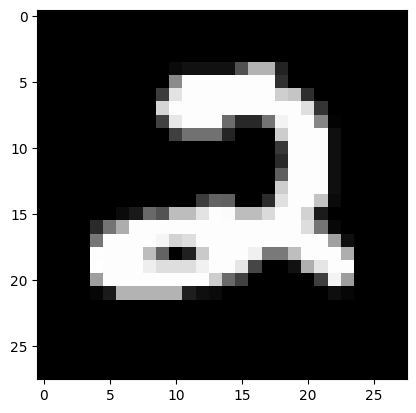

In [ ]:
# test unitaire sur df_test:
test_0 = df_test.iloc[0,:] # 1ere ligne de df_test
test_0_rshp = test_0.values.reshape(28,28)
plt.imshow(test_0_rshp, cmap="gray")
test_0 = (test_0.values) / 255

0


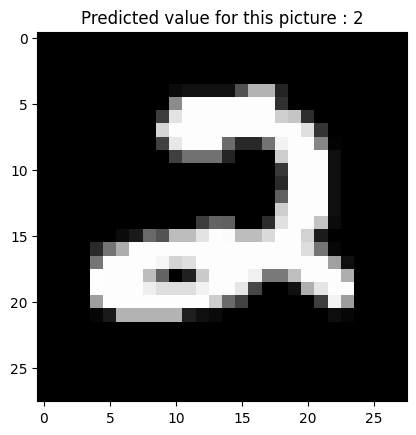

1


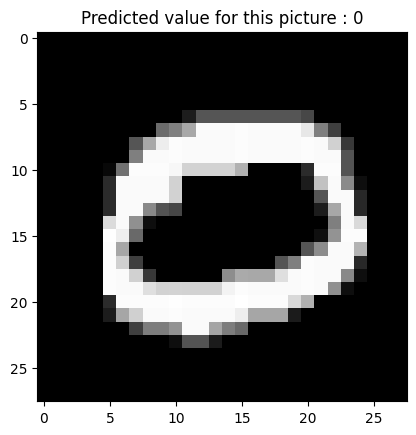

2


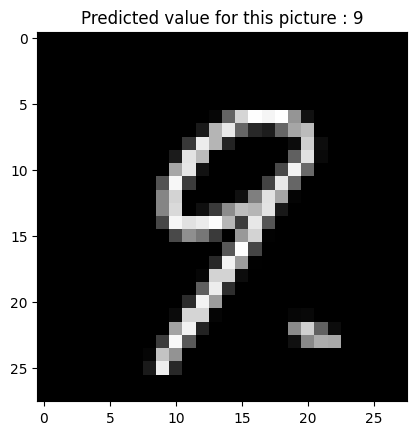

3


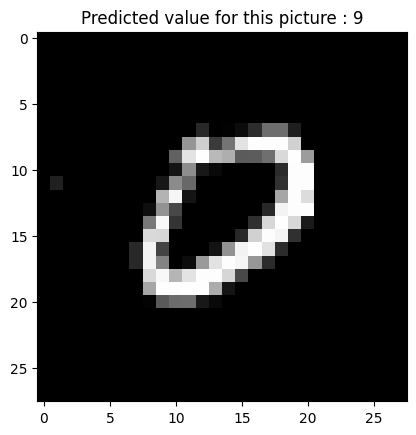

4


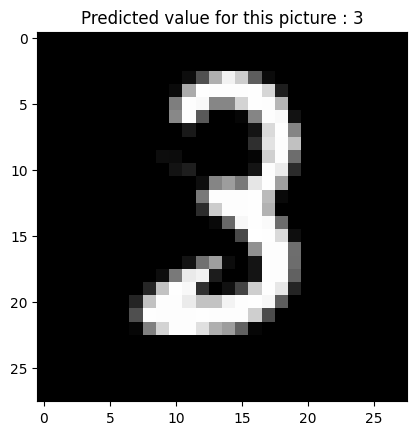

5


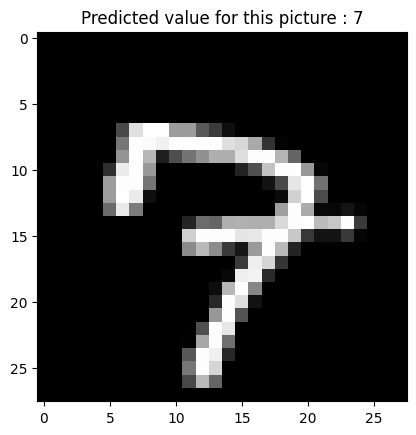

6


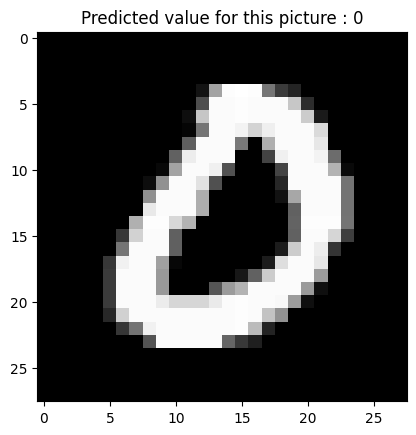

7


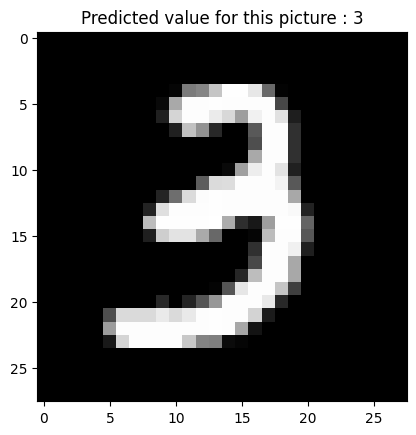

8


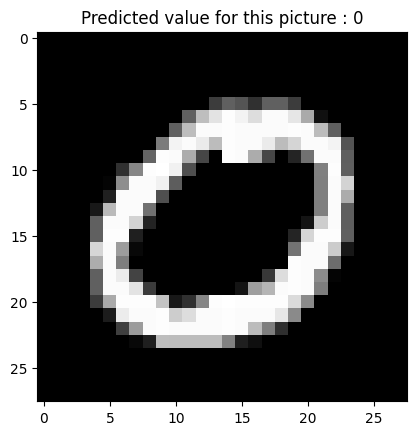

9


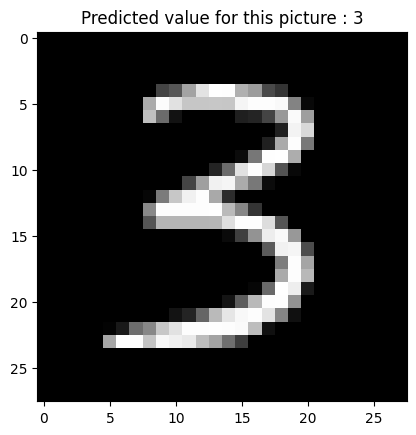

10


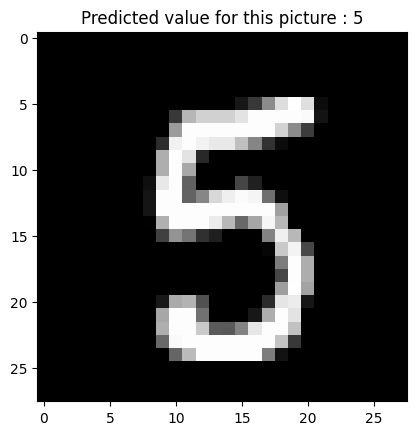

11


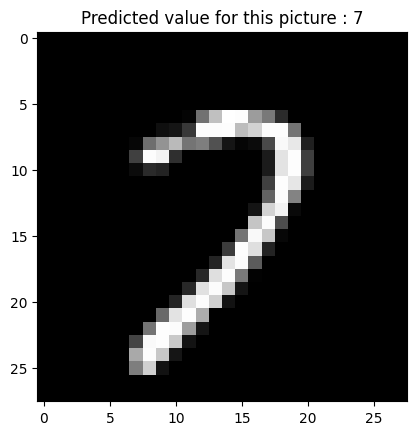

12


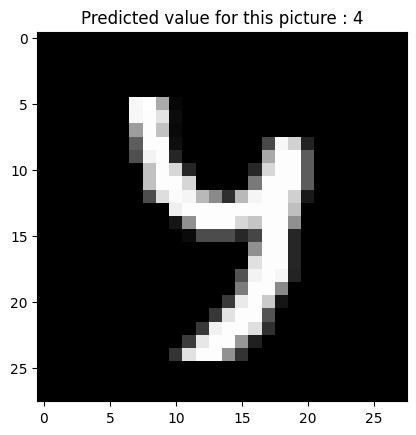

13


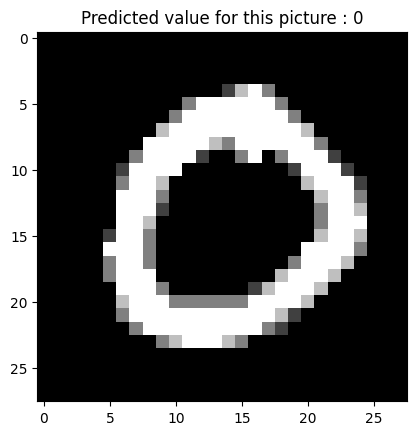

14


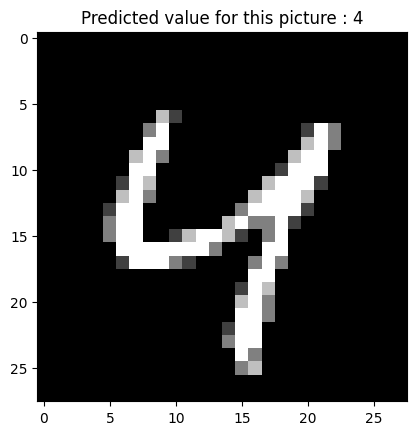

15


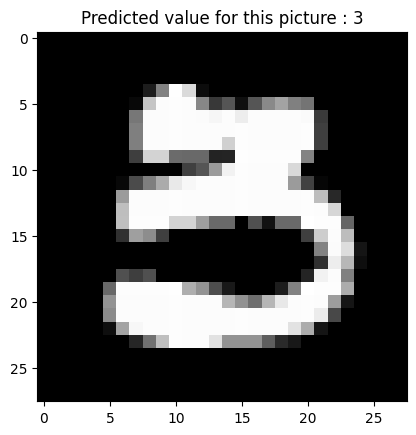

16


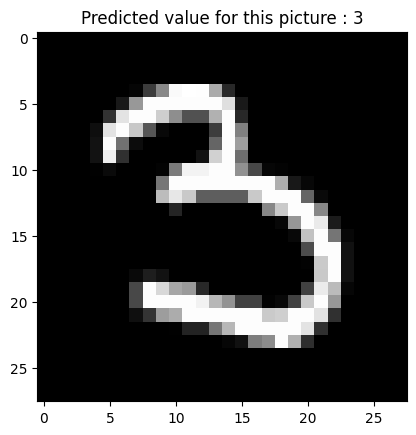

17


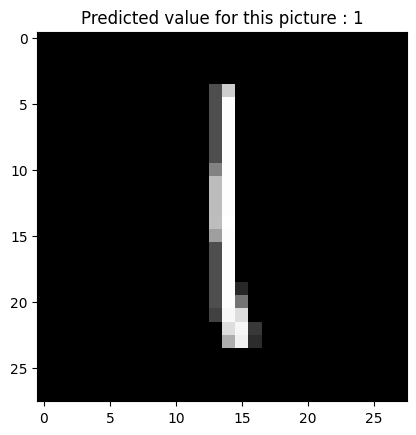

18


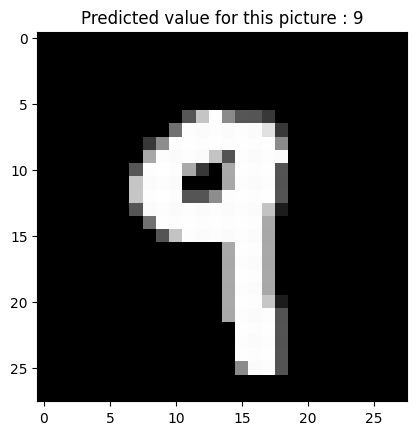

19


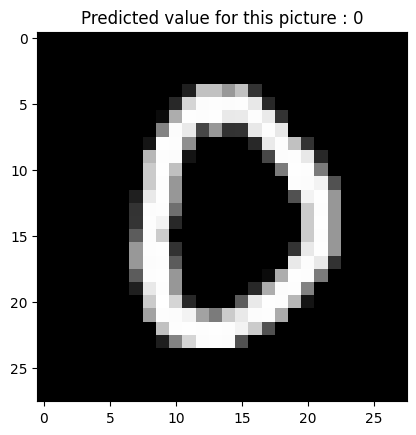

In [ ]:
test_50_first = df_test.iloc[0:20,:]

for idx in range(len(test_50_first)):
  print(idx)
  img = test_50_first.iloc[idx,:].values
  img_plt = img.reshape(28,28)
  img = (img) / 255
  pred = grid.predict(img.reshape(1,-1))
  plt.imshow(img_plt, cmap = "gray")
  label = np.argmax(pred)
  plt.title(f"Predicted value for this picture : {label}")
  plt.show()


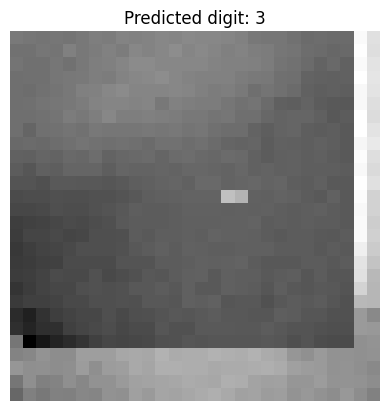

In [ ]:
#### Prendre un photo de chiffres que j'écris manuellement et voir quelle est la prédiction de mon algo. ###############

import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/MNIST/photo2.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Charger en niveaux de gris

# Redimensionner à 28x28 pixels (comme MNIST)
img_resized = cv2.resize(img, (28, 28))

# Inverser les couleurs (si fond blanc et chiffre noir, MNIST est l'inverse)
img_resized = 255 - img_resized

# Normaliser (valeurs entre 0 et 1)
img_normalized = img_resized / 255.0

# Aplatir l’image en un vecteur de 784 pixels
img_flattened = img_normalized.flatten().reshape(1, -1)

# Faire la prédiction avec le modèle entraîné
prediction = grid.predict(img_flattened)

# Afficher l’image et la prédiction
plt.imshow(img_resized, cmap="gray")
plt.title(f"Predicted digit: {np.argmax(prediction[0])}")
plt.axis("off")
plt.show()

# My image resized 28x28 is just unreadable, we don' see anything.
# Have to see how to manage that